# Noget om fodbold

## Relevant imports and settings

In [14]:
%matplotlib inline
import pandas as pd
import sqlite3

### Dataset overview and import into pandas

To get an overview of the dataset format, we first extract all the table names.

In [59]:
conn = sqlite3.connect("soccer.sqlite")
table_names = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
table_names

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


We want to store our data in a dataframe, which do not support multiple tables. Instead we create a dictionary with keynames corresponding to table_names. To each of these keys, we add a dataframe based on data from the SQL-table.

In [60]:
ds = {}
for name in table_names.values.tolist():
    ds[name[0]] = pd.read_sql_query("SELECT * FROM {}".format(name[0]), conn)

In [61]:
list(ds.keys())

['sqlite_sequence',
 'Player_Attributes',
 'Player',
 'Match',
 'League',
 'Country',
 'Team',
 'Team_Attributes']

In [63]:
ds['Player'].tail()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172
11059,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176


In [66]:
ds['Player']['height'].tail()

11055    182.88
11056    182.88
11057    180.34
11058    185.42
11059    180.34
Name: height, dtype: float64

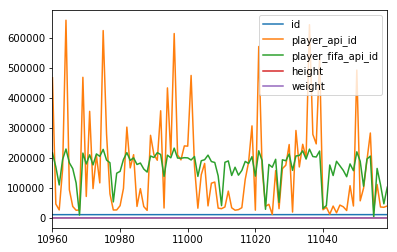

In [64]:
ds['Player'].tail(100).plot()